# importing libraries

In [61]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression,SGDRegressor
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [4]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x20e1b52ab10>)

In [5]:
medical_df = pd.read_csv('medical.csv')
medical = pd.read_csv('medical.csv')

In [6]:
medical_df
#print(medical_df['region'].unique())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## exploratory data analysis 

(array([69., 68., 29., 28., 28., 28., 28., 28., 28., 28., 28., 27., 27.,
        27., 26., 26., 26., 25., 25., 25., 25., 25., 27., 27., 27., 27.,
        27., 29., 29., 29., 29., 28., 29., 29., 29., 28., 28., 26., 26.,
        26., 25., 25., 23., 23., 23., 23., 22.]),
 array([18.        , 18.9787234 , 19.95744681, 20.93617021, 21.91489362,
        22.89361702, 23.87234043, 24.85106383, 25.82978723, 26.80851064,
        27.78723404, 28.76595745, 29.74468085, 30.72340426, 31.70212766,
        32.68085106, 33.65957447, 34.63829787, 35.61702128, 36.59574468,
        37.57446809, 38.55319149, 39.53191489, 40.5106383 , 41.4893617 ,
        42.46808511, 43.44680851, 44.42553191, 45.40425532, 46.38297872,
        47.36170213, 48.34042553, 49.31914894, 50.29787234, 51.27659574,
        52.25531915, 53.23404255, 54.21276596, 55.19148936, 56.17021277,
        57.14893617, 58.12765957, 59.10638298, 60.08510638, 61.06382979,
        62.04255319, 63.0212766 , 64.        ]),
 <BarContainer object of 

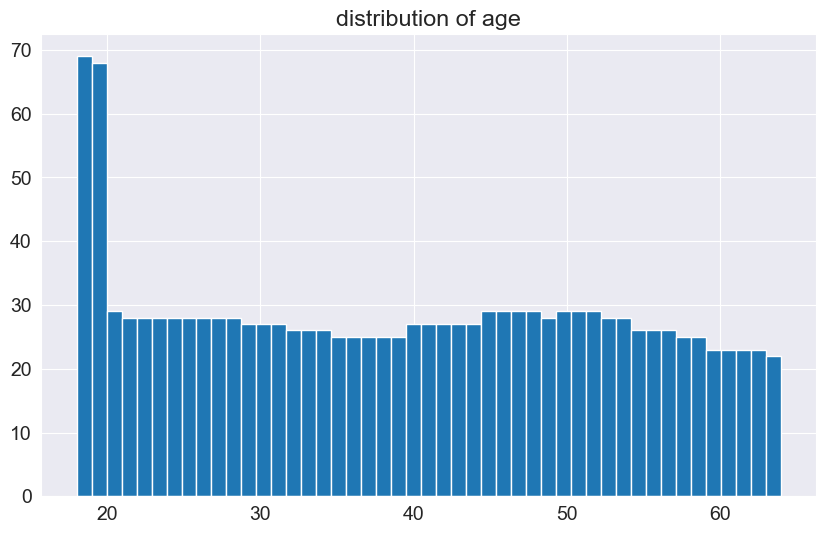

In [9]:
plt.title('distribution of age')
plt.hist(medical_df.age,bins=47)

(array([ 1.,  9.,  7.,  9.,  9., 24., 17., 30., 31., 45., 48., 43., 61.,
        51., 64., 73., 57., 71., 72., 58., 66., 68., 57., 48., 40., 48.,
        49., 33., 19., 27., 26., 14., 14., 12.,  7.,  6.,  4.,  4.,  7.,
         2.,  3.,  1.,  0.,  1.,  0.,  0.,  2.]),
 array([15.96      , 16.75085106, 17.54170213, 18.33255319, 19.12340426,
        19.91425532, 20.70510638, 21.49595745, 22.28680851, 23.07765957,
        23.86851064, 24.6593617 , 25.45021277, 26.24106383, 27.03191489,
        27.82276596, 28.61361702, 29.40446809, 30.19531915, 30.98617021,
        31.77702128, 32.56787234, 33.3587234 , 34.14957447, 34.94042553,
        35.7312766 , 36.52212766, 37.31297872, 38.10382979, 38.89468085,
        39.68553191, 40.47638298, 41.26723404, 42.05808511, 42.84893617,
        43.63978723, 44.4306383 , 45.22148936, 46.01234043, 46.80319149,
        47.59404255, 48.38489362, 49.17574468, 49.96659574, 50.75744681,
        51.54829787, 52.33914894, 53.13      ]),
 <BarContainer object of 

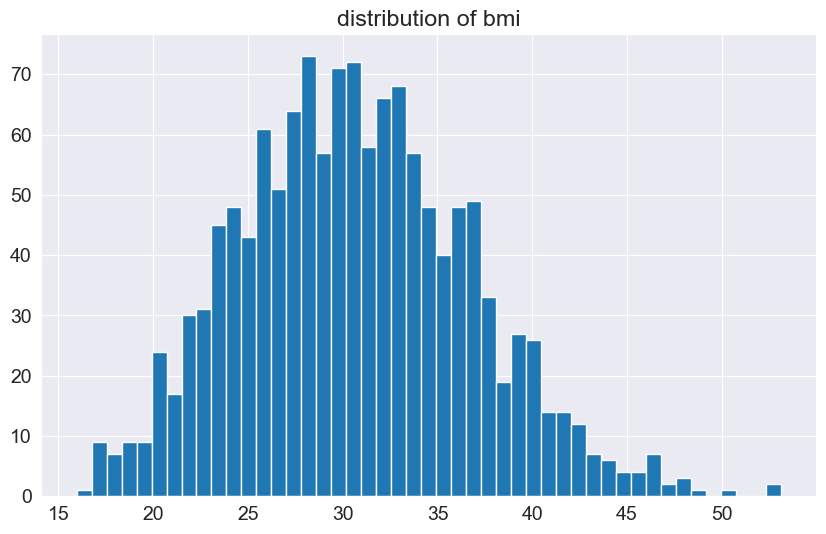

In [10]:
plt.title('distribution of bmi')
plt.hist(medical_df.bmi,bins=47)
## it has a normal distribution here 

(array([80., 81., 64., 56., 74., 54., 54., 58., 47., 62., 47., 50., 47.,
        54., 48., 41., 32., 22.,  7.,  4.,  3.,  2.,  4.,  8.,  4.,  8.,
         3.,  4.,  3.,  3.,  6.,  3.,  6.,  3.,  5.,  5.,  2.,  0.,  4.,
         0.,  2.,  0.,  1.,  0.,  1.,  0.,  2.]),
 array([ 1121.8739    ,  1883.3363283 ,  2644.7987566 ,  3406.26118489,
         4167.72361319,  4929.18604149,  5690.64846979,  6452.11089809,
         7213.57332638,  7975.03575468,  8736.49818298,  9497.96061128,
        10259.42303957, 11020.88546787, 11782.34789617, 12543.81032447,
        13305.27275277, 14066.73518106, 14828.19760936, 15589.66003766,
        16351.12246596, 17112.58489426, 17874.04732255, 18635.50975085,
        19396.97217915, 20158.43460745, 20919.89703574, 21681.35946404,
        22442.82189234, 23204.28432064, 23965.74674894, 24727.20917723,
        25488.67160553, 26250.13403383, 27011.59646213, 27773.05889043,
        28534.52131872, 29295.98374702, 30057.44617532, 30818.90860362,
        315

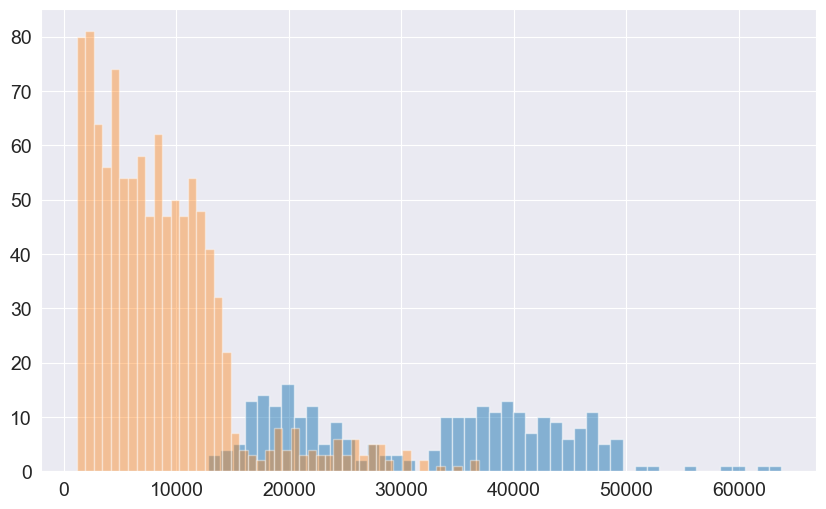

In [11]:
plt.hist(medical_df.charges[medical_df.smoker == 'yes'],bins=47,alpha=0.5)
plt.hist(medical_df.charges[medical_df.smoker == 'no'],bins=47,alpha =0.4)
# this graph follows the 'power law' or an exponenetial graph

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


<BarContainer object of 1338 artists>

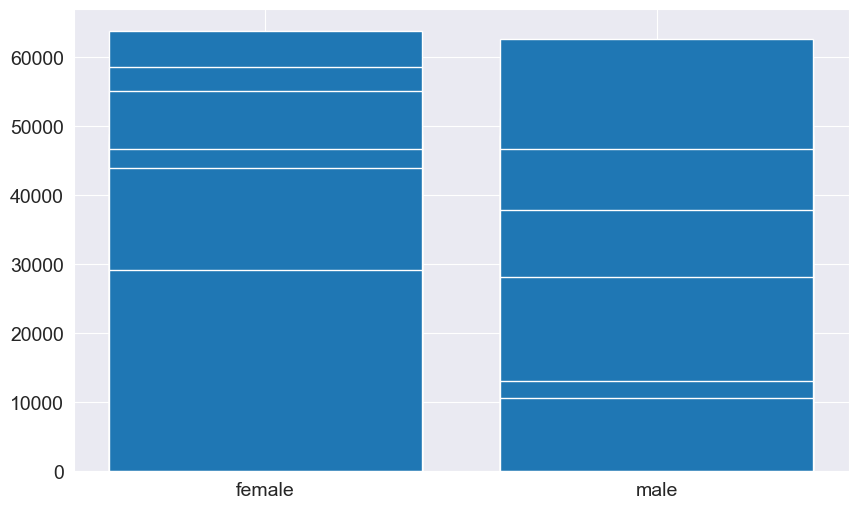

In [12]:
print(medical_df.head())
plt.bar(medical_df.sex,medical_df.charges)

<BarContainer object of 1338 artists>

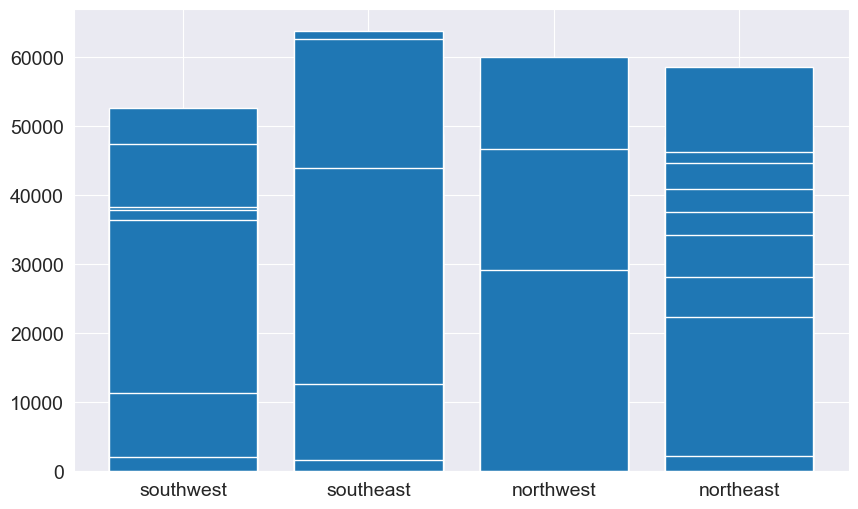

In [13]:
plt.bar(medical_df.region, medical_df.charges)

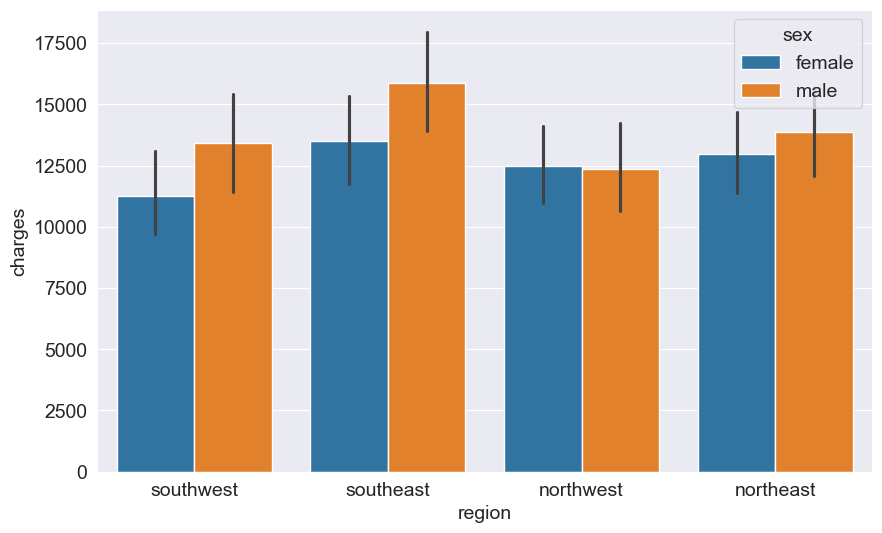

In [14]:
sns.barplot(x='region', y='charges', hue='sex', data= medical_df);

In [15]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Text(0.5, 1.0, 'age vs charges')

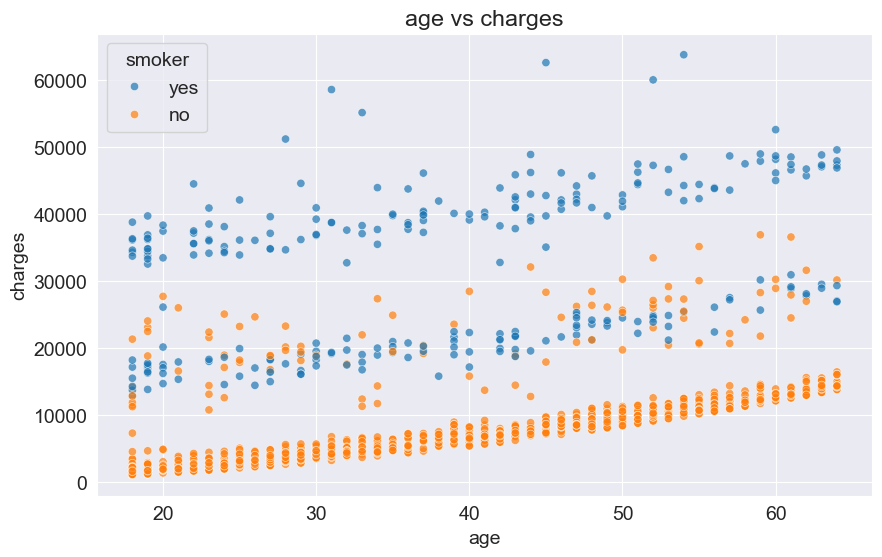

In [16]:
sns.scatterplot(x=medical_df.age,
                y=medical_df.charges,
                hue = medical_df.smoker,
                alpha=0.7
               )
plt.title("age vs charges")
#make assumptions using the relationships

Text(0.5, 1.0, 'BMI vs charges')

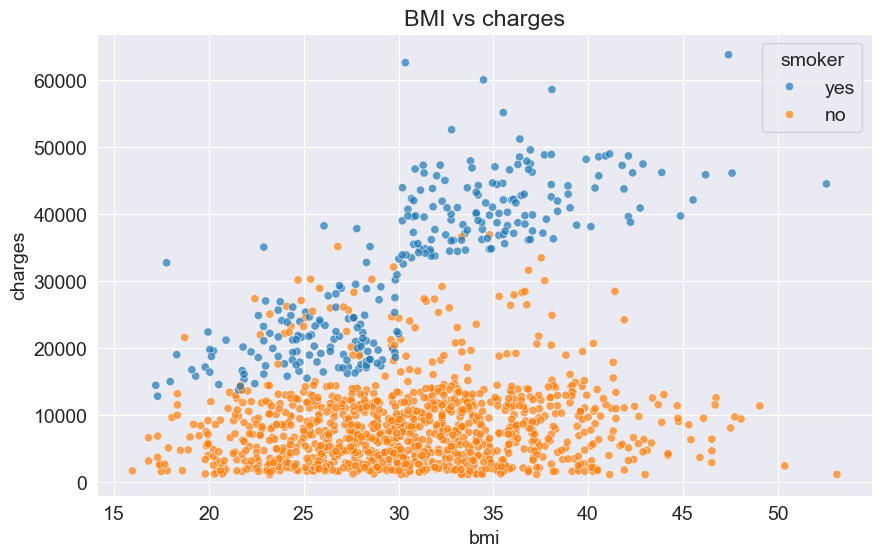

In [17]:
sns.scatterplot(x=medical_df.bmi,
                y=medical_df.charges,
                hue = medical_df.smoker,
                alpha=0.7
               )
plt.title("BMI vs charges")
#make assumptions using the relationships

<Axes: xlabel='children', ylabel='charges'>

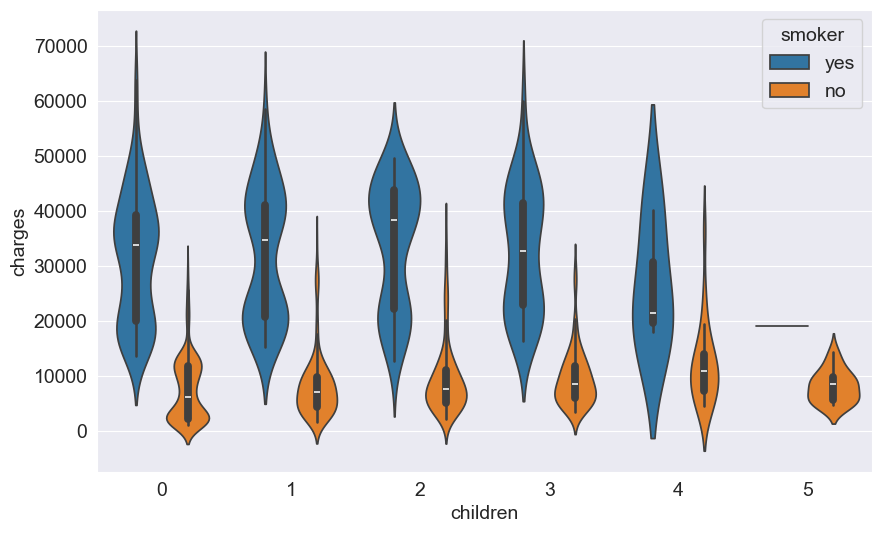

In [18]:
sns.violinplot(x='children', y='charges',hue = 'smoker', data=medical_df)

<Axes: xlabel='children', ylabel='charges'>

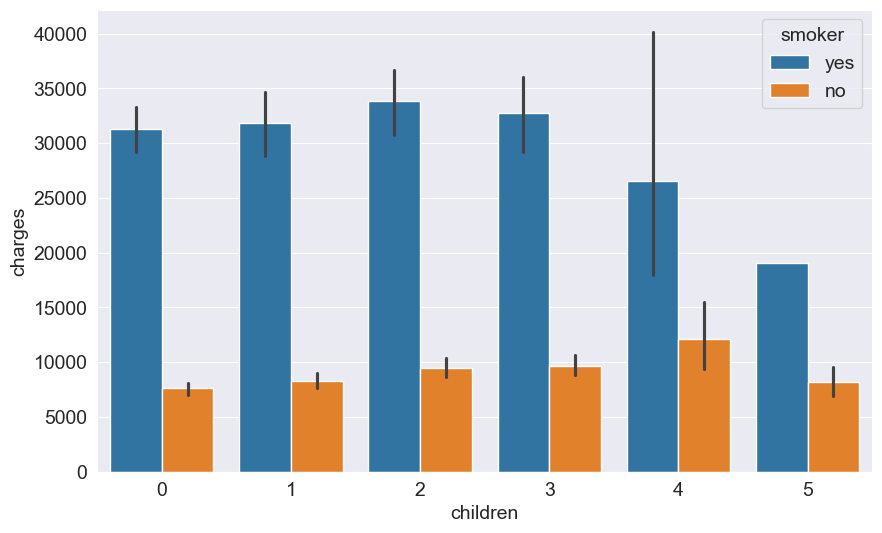

In [19]:
sns.barplot(x='children',y='charges',hue='smoker',data=medical_df)

<b>the people who smoke have a higher charge value with or without children so there 
is no relationship between being smoker, having children and charges </b>

<Axes: xlabel='region', ylabel='charges'>

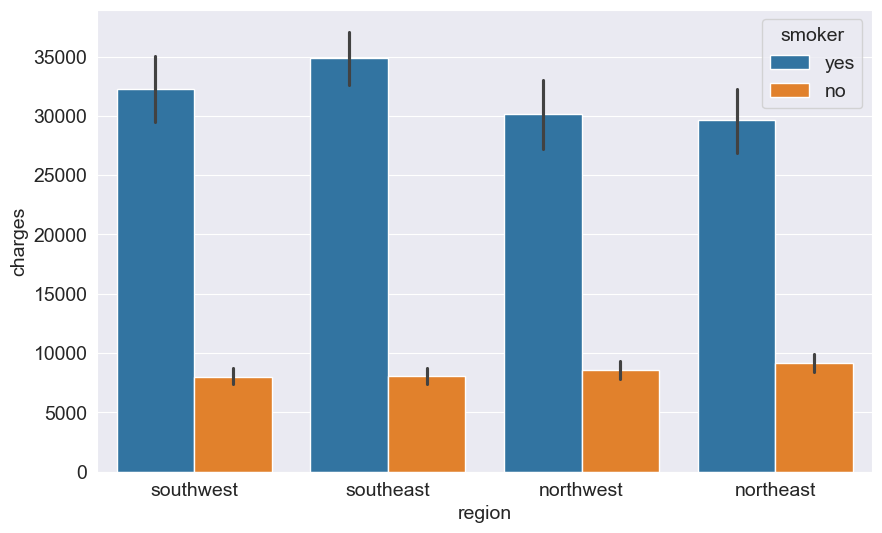

In [20]:
sns.barplot(x='region',y='charges',hue='smoker',data= medical_df)
#sns.barplot(x='region',y='charges',data= medical_df)

## correlation 


In [21]:
medical_df.smoker.replace(['no', 'yes'],
                        [0, 1],inplace=True)
medical_df.sex.replace(['female','male'],
                       [0,1],inplace =True)

C:\Users\Chetan\AppData\Local\Temp\ipykernel_12888\1736733215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical_df.smoker.replace(['no', 'yes'],
C:\Users\Chetan\AppData\Local\Temp\ipykernel_12888\1736733215.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_df.smoker.replace(['no'

In [22]:
    medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [23]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [24]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [25]:
medical_df.charges.corr(medical_df.smoker)

0.7872514304984778

In [26]:
medical_df.charges.corr(medical_df.sex)

0.05729206220202533

In [27]:
medical_df.corr(numeric_only = True)

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


<Axes: >

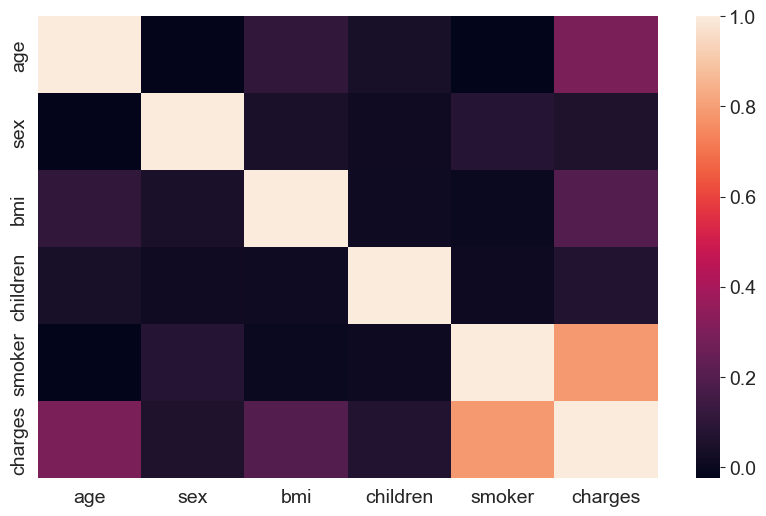

In [28]:
sns.heatmap(medical_df.corr(numeric_only = True))

## linear Regreasion using a single feature
<p>it is basically fitting a line throught the above scatter plot of ages vs charges. It is then used to predict answer give the ages parameters .
and to make it automatic you use the root mean squared error </p>

In [29]:
non_smoker_df = medical_df[medical_df.smoker == 0]
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160


In [30]:
def estimate_charges(age, w, b):
    return w * age + b

In [50]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

In [47]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

## root mean squred error 


In [48]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [49]:
w = 50 
b = 100

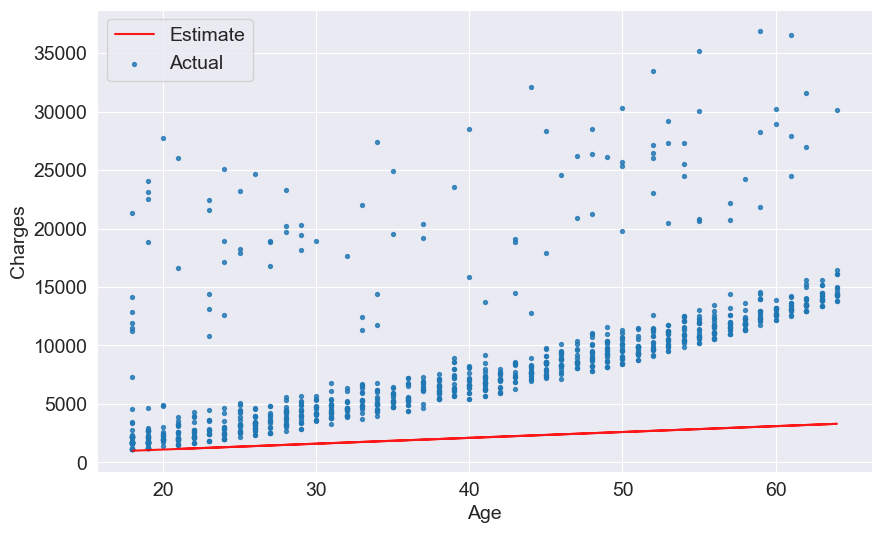

In [51]:
try_parameters(w,b)

In [52]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age,w,b)

In [53]:
rmse(targets, predicted)

8461.949562575493

In [54]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictons = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

## linear regression

In [36]:
model = LinearRegression()

In [37]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [40]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

In [41]:
model.fit(inputs, targets)

LinearRegression()

In [45]:
predictions = model.predict(inputs)

In [59]:
print(predictions)
print(targets)

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


In [56]:
rmse(targets,predictions)

4662.505766636395

In [68]:
model1=SGDRegressor()

In [67]:
model1.fit(inputs, targets)

SGDRegressor()

In [71]:
rmse(targets, predictions)

4662.505766636395

In [92]:
smoker = medical_df[medical_df.smoker == 1]
inputs = smoker[['age']]
targets = smoker.charges

In [90]:
inputs

,age
0,19
11,62
14,27
19,30
23,34
...,...
1313,19
1314,30
1321,62
1323,42


In [96]:
model.fit(inputs, targets)

LinearRegression()

In [104]:
predictions = model.predict(input)

In [105]:
rmse(targets, predictions)

10711.00334810241